# <u>TMDB Dataset</u>
  ### *An Initial Look: Exploratory Data Analysis and some key insights*
> Archie Porteous DA13

# <u>Contents</u> 

### **1.** Importing the dataset    
 * **1.1** Importing the csv from a local path into a Pandas DataFrame     
 * **1.2** Quick Look using `.describe()` & `.head()`      

### **2.** Data Cleaning  
 * **2.1** Refromatting the '*genre*', '*keywords*', etc.. columns  
 * **2.2** Checking for nulls
 * **2.3** Deduplicating Rows

### **3.** Exploratory Insights/Keypoints
 *  **3.1** Budget Efficiency (revenue/dollar)
 *  **3.2** What Catergories do Voters like?

### **4.** Single Observation Analyses
 * **4.1** Most popular film
 * **4.2** Least popular film (with a production company in its record)

<img src = "https://images.unsplash.com/photo-1542204165-65bf26472b9b?q=80&w=1374&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" width=400px height=300px />

# **1.** Importing the dataset

### **1.1** Importing the csv from a local path into a Pandas DataFrame

In [9]:
# Importing Required Libraries
import numpy as np  # maths
import seaborn as sns # visualisation
import matplotlib.pyplot as plt # visualisation
import pandas as pd # dataframes & data analysis
import re # RegEx

In [10]:
path = "TMDB_movies.csv"

df = pd.read_csv(path)

### **1.2** Quick Look using `.describe()` & `.head()`

In [12]:
df.shape

(4803, 20)

In [13]:
df.describe(include="all")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
count,4.803000e+03,4803,1712,4803.000000,4803,4803,4803,4800,4803.000000,4803,4803,4802,4.803000e+03,4801.000000,4803,4803,3959,4803,4803.000000,4803.000000
unique,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,469,3280,NaN,NaN,544,3,3944,4800,NaN,NaN
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,NaN,[],en,Out of the Blue,"In the 22nd century, a paraplegic Marine is di...",NaN,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host,NaN,NaN
freq,NaN,370,4,NaN,412,4505,2,1,NaN,351,2977,10,NaN,NaN,3171,4795,3,2,NaN,NaN
mean,2.904504e+07,NaN,NaN,57165.484281,NaN,NaN,NaN,NaN,21.492301,NaN,NaN,NaN,8.226064e+07,106.875859,NaN,NaN,NaN,NaN,6.092172,690.217989
std,4.072239e+07,NaN,NaN,88694.614033,NaN,NaN,NaN,NaN,31.816650,NaN,NaN,NaN,1.628571e+08,22.611935,NaN,NaN,NaN,NaN,1.194612,1234.585891
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,7.900000e+05,NaN,NaN,9014.500000,NaN,NaN,NaN,NaN,4.668070,NaN,NaN,NaN,0.000000e+00,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000
50%,1.500000e+07,NaN,NaN,14629.000000,NaN,NaN,NaN,NaN,12.921594,NaN,NaN,NaN,1.917000e+07,103.000000,NaN,NaN,NaN,NaN,6.200000,235.000000
75%,4.000000e+07,NaN,NaN,58610.500000,NaN,NaN,NaN,NaN,28.313505,NaN,NaN,NaN,9.291719e+07,118.000000,NaN,NaN,NaN,NaN,6.800000,737.000000


In [14]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# **2.** Data Cleaning 

### **2.1** Refromatting the '*genre*', '*keywords*', etc.. columns

In [17]:
df.spoken_languages[0]

'[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}]'

In [18]:
def clean_str(string):
    return re.findall("\"name\":\s\"([^}{\"]+)\"",string)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_63890/1782625454.py:2: SyntaxWarning: invalid escape sequence '\s'
  return re.findall("\"name\":\s\"([^}{\"]+)\"",string)


In [19]:
clean_str('[{"id": 28, "name": "Action"},{"id": 60, "name": "Adventure"},{"name": "Ingenious Film Partners", "id": 289},{"iso_3166_1": "US", "name": "United States of America"},{"iso_639_1": "en", "name": "English"}]')

['Action',
 'Adventure',
 'Ingenious Film Partners',
 'United States of America',
 'English']

In [20]:
df_eda = df.copy()

In [21]:
for column in ['genres','keywords','production_companies','production_countries','spoken_languages']:
    df_eda[column] = df_eda[column].apply(clean_str)

In [22]:
df_eda.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Espa\u00f1ol]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Fran\u00e7ais, English, Espa\u00f1ol, Italian...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124


### **2.2** Checking for nulls

In [24]:
# counting nulls
null_df = df_eda.isnull() # truth table
null_df.sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

### **2.3** Checking for Duplicates

In [ ]:
unique_id = set(df_eda.id)
len(unique_id)

In [165]:
df_eda.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_average,vote_count,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,7.2,11800,Action,Adventure,Fantasy,Science Fiction,NaN,NaN,NaN,NaN
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,6.9,4500,Adventure,Fantasy,Action,NaN,NaN,NaN,NaN,NaN
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,6.3,4466,Action,Adventure,Crime,NaN,NaN,NaN,NaN,NaN
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",...,7.6,9106,Action,Crime,Drama,Thriller,NaN,NaN,NaN,NaN
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,6.1,2124,Action,Adventure,Science Fiction,NaN,NaN,NaN,NaN,NaN


# **3.** Exploratory Insights/Keypoints

## **3.1** Budget Efficiency (revenue/dollar)

### Top 10 Films by Budget

In [ ]:
top_10_budget = df_eda.sort_values('budget',ascending=False)[['budget', 'title']].head(10)
top_10_budget

/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_63890/3942363610.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title',


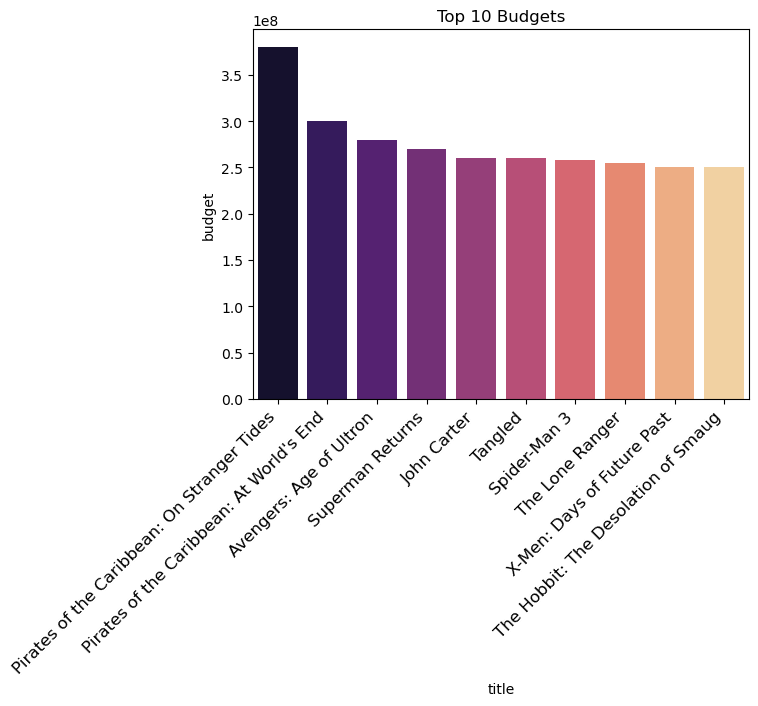

In [45]:
sns.barplot(x='title',
            y='budget',
            data=top_10_budget,
            palette = 'magma')


plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='large'
           )

plt.title('Top 10 Budgets')

plt.show()

> ### Conclusion:
> *Pirates of the Caribbean: On Stranger Tides* is the film with the most expensive budget in our dataset. This is due to its many filming locations and extensive use of state-of-the-art visual effects

### Top 10 Films by Revenue

In [ ]:
top_10_revenue = df_eda.sort_values('revenue',ascending=False)[['revenue', 'title']].head(10)
top_10_revenue

/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_63890/818369740.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title',


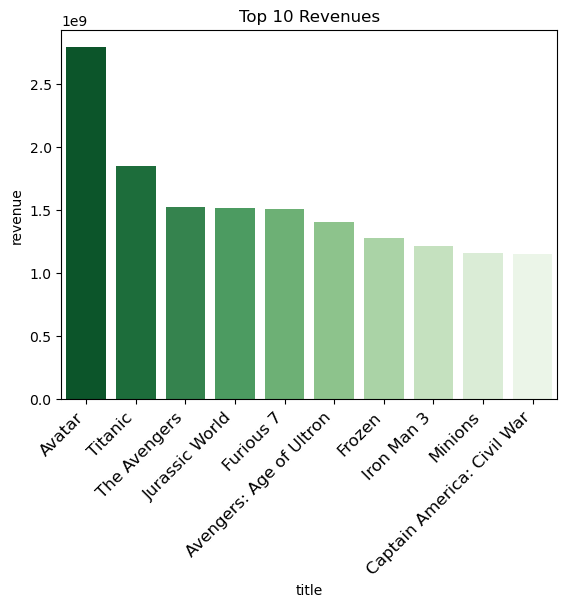

In [51]:
sns.barplot(x='title',
            y='revenue',
            data=top_10_revenue,
            palette = 'Greens_r')


plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='large'
           )

plt.title('Top 10 Revenues')

plt.show()

> ### Conclusion:
> *Avatar* was the highest grossing film in our dataset. Avatar had a captivating story and amazing visuals.

### **Top 10 Films by Revenue per Dollar Budget**

In [ ]:
print(df_eda[df_eda.budget==0].shape[0])
print(df_eda[df_eda.revenue==0].shape[0])

In [ ]:
df_eda[df_eda.budget==0].index

In [ ]:
df_zeros = df_eda.copy()
df_zeros.drop(index=df_zeros[df_eda.budget==0].index, inplace=True)
df_zeros.drop(index=df_zeros[df_eda.revenue==0].index, inplace=True)


In [ ]:
df_zeros['rev_bud'] = df_zeros['revenue']/df_zeros['budget']
top_10_efficiency = df_zeros.sort_values('rev_bud',ascending=False)[['rev_bud', 'title']].head(10)
top_10_efficiency

/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_63890/2448949670.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title',


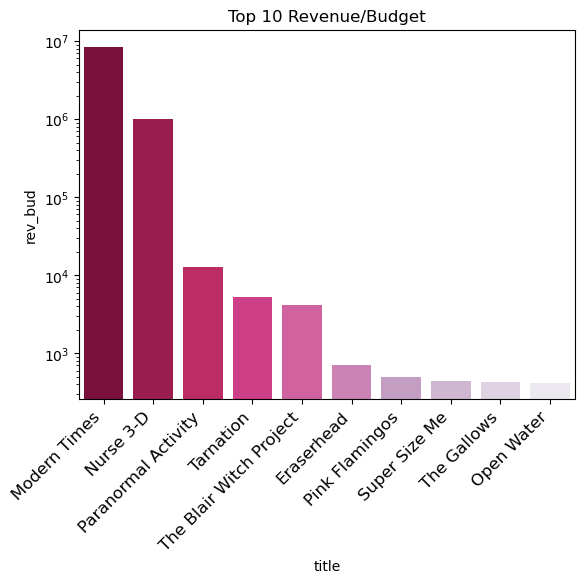

In [63]:
sns.barplot(x='title',
            y='rev_bud',
            data=top_10_efficiency,
            palette = 'PuRd_r')


plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='large'
           )

plt.title('Top 10 Revenue/Budget')

plt.yscale('log')
plt.show()

> ### Conclusion:
> *Modern Times* was one of the American Film Institutes Top 100 Films in 1998 and was first shown in theatres in 1936. This longevity is a likely factor to its great success. But it is also worth taking into considereation that the dollars in the dataset are not said to be adjusted for inflation!
>
> 
> *Paranormal Activity* is another interesting example shown in the graph above. It had a budget of a mere $15000 and was shot over just 10 days. It had basic scenes with static camera angles and the script was only made of rough guidlines for the actors.

In [ ]:
df_zeros[df_zeros['title']=="Paranormal Activity"]['budget']

## **3.2** What Genres do voters like?

### What are the highest scored Genres by average score per Genre?

**What is the max number of genres per film?**

In [ ]:
genre_count = df_eda.genres.apply(lambda x:len(x))
print(genre_count)
print('Max number of Genres of a film:' , max(genre_count))

**What genres are there?**

In [ ]:
# We first create the new columns and fill them as empty

for genre in range(max(genre_count)+1):
    df_eda[f'genre_{genre}'] = np.nan
    
# We then go though every row/film looking at each list of its genres and adding each genre to one of the
#  new columns made above
for index in df_eda.index:
    genres = df_eda['genres'][index]
    for genre in genres:
        df_eda[f'genre_{genres.index(genre)}'][index] = genre

In [76]:
genres = set()

for lst in df_eda.genres:
    for genre in lst:
        if genre not in genres:
            genres.add(genre)

In [ ]:
genres

In [80]:
avg_score = dict()

for genre in genres:
    total_score = 0
    total_num = 0
    
    for num in range(8):
       if any(df_eda[f'genre_{num}'].isin([genre])):

            total_score += df_eda.groupby(f'genre_{num}')[['vote_average']].sum()['vote_average'][genre]
            total_num += df_eda.groupby(f'genre_{num}')[['vote_average']].count()['vote_average'][genre]
    
    avg_score[genre] = round(total_score/total_num,2) 
    
        
        

In [ ]:
avg_score

In [ ]:
df_avg_score = pd.DataFrame( {'genre':avg_score.keys(), 'avg_score':avg_score.values()}).sort_values('avg_score',ascending = False)
df_avg_score

/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_63890/2221368673.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_avg_score['genre'],


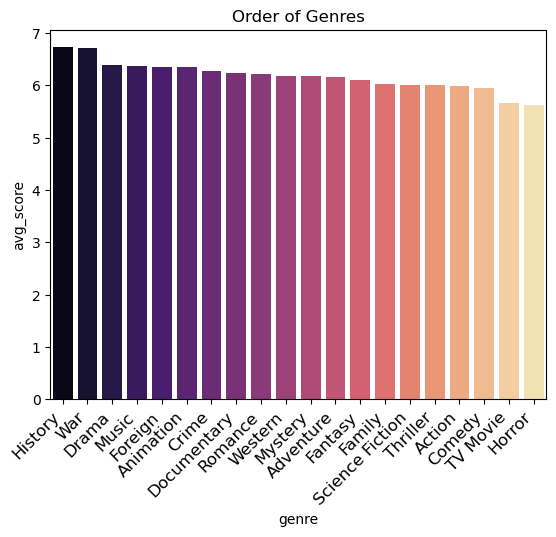

In [86]:
sns.barplot(x=df_avg_score['genre'],
            y=df_avg_score['avg_score'],
            palette = 'magma',
            order = df_avg_score.sort_values('avg_score',ascending=False).genre)


plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='large'
           )

plt.title('Order of Genres')

plt.show()

> ### Conclusion:
>
>
> This barchart shows the average score over all films with a given genre in its list of genres. *History* comes out on top but there is little variation in this graph due to the genres reoccuring in the genre lists thoughout most movies.

# **4.** Single Observation Analyses

## **4.1** The most popular film

In [ ]:
df_eda.head()

In [139]:
df_eda.sort_values('popularity',ascending=False).head(1)[['title','popularity','production_companies']]

,title,popularity,production_companies
546,Minions,875.581305,"[Universal Pictures, Illumination Entertainment]"


In [243]:
df_production = df_eda.copy()

In [245]:
def minion(column):
    boolean = []
    for companies in column:
        boolean2 = []
        if len(companies)==2:
            for company in companies:
                if company=="Universal Pictures"  or company=="Illumination Entertainment":
                    boolean2.append(True)
                else:
                    boolean2.append(False)
            if all(boolean2):
                boolean.append(True) 
            else:
                boolean.append(False)
        elif len(companies)!=2:
            boolean.append(False)
    return boolean                

In [ ]:
minion_films = df_production[minion(df_production['production_companies'])].sort_values('popularity',ascending=False)
minion_films

/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_63890/3972758049.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title',


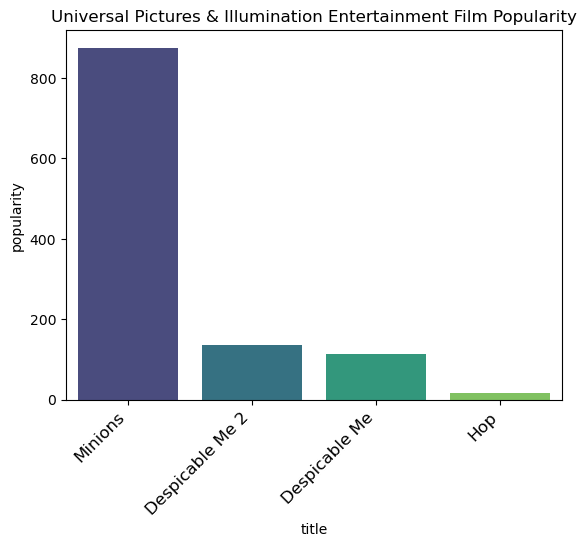

In [274]:
sns.barplot(x='title',
            y='popularity',
            data= minion_films,
            palette = 'viridis')

plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='large'
           )

plt.title('Universal Pictures & Illumination Entertainment Film Popularity')

plt.show()

> ### Conclusion:
>
>
> Minions is our most popular film in the *entire* database. Comparing this film's popularity with other films made by the same production companies we see that Minions' popularity is an outlier compared to the others in terms of popularity.

## **4.2** The least popular film (with a poduction company in its record)

In [294]:
df_eda[df_eda['production_companies'].apply(lambda x: len(x)) != 0 ].sort_values('popularity',ascending=True).head(5)[['title','popularity','production_companies']]

,title,popularity,production_companies
4509,Love Letters,0.001586,"[New World Pictures, Millennium Films]"
4500,Carousel of Revenge,0.006069,"[The Picture Factory, B.Sting Entertainment]"
4626,Anderson's Cross,0.006323,[Illumination Pictures]
4444,Elza,0.007254,"[France T\u00e9l\u00e9vision, Aztec Musique, C..."
3967,Four Single Fathers,0.008263,[Indiana Production Company]


In [299]:
def love(column):
    boolean = []
    for companies in column:
        boolean2 = []
        if len(companies)==2:
            for company in companies:
                if company=="New World Pictures"  or company=="Millennium Films":
                    boolean2.append(True)
                else:
                    boolean2.append(False)
            if all(boolean2):
                boolean.append(True) 
            else:
                boolean.append(False)
        elif len(companies)!=2:
            boolean.append(False)
    return boolean      

In [301]:
love_films = df_production[love(df_production['production_companies'])].sort_values('popularity',ascending=True)
love_films

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_average,vote_count,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
4509,550000,"[Drama, Thriller]",NaN,75986,"[obsession, radio, nudity, letter, love, roman...",en,Love Letters,A story of love and obsession. A young radio p...,0.001586,"[New World Pictures, Millennium Films]",...,4.6,4,Drama,Thriller,NaN,NaN,NaN,NaN,NaN,NaN


***Love Letters* is the only film in our dataset produced by *New World Pictures* and *Millenium Films*. So lets looks at all films with one of its production companies as *New World Pictures* and focus on it.**

In [306]:
def love2(column):
    boolean = []
    for companies in column:
        boolean2 = []
        if len(companies)==2:
            for company in companies:
                if company=="New World Pictures":
                    boolean2.append(True)
                else:
                    boolean2.append(False)
            if any(boolean2):
                boolean.append(True) 
            else:
                boolean.append(False)
        elif len(companies)!=2:
            boolean.append(False)
    return boolean    

In [308]:
love_films_2 = df_production[love2(df_production['production_companies'])].sort_values('popularity',ascending=True)
love_films_2

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_average,vote_count,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
4509,550000,"[Drama, Thriller]",NaN,75986,"[obsession, radio, nudity, letter, love, roman...",en,Love Letters,A story of love and obsession. A young radio p...,0.001586,"[New World Pictures, Millennium Films]",...,4.6,4,Drama,Thriller,NaN,NaN,NaN,NaN,NaN,NaN
4276,0,[Science Fiction],NaN,42033,"[post-apocalyptic, dystopia, canuxploitation]",en,Def-Con 4,Two men and a woman circle the globe in a sate...,0.319792,"[New World Pictures, Salter Street Films Inter...",...,2.8,10,Science Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4284,1250000,"[Horror, Science Fiction]",NaN,23730,"[monster, mutant, shower, police, blood splatt...",en,C.H.U.D.,A rash of bizarre murders in New York City see...,4.455440,"[New World Pictures, C.H.U.D. Productions]",...,5.3,62,Horror,Science Fiction,NaN,NaN,NaN,NaN,NaN,NaN
3829,3500000,[Horror],NaN,16288,"[lake, anthology, revenge, murder, blob, gore,...",en,Creepshow 2,EC Comics-inspired weirdness returns with thre...,10.729884,"[New World Pictures, Laurel Entertainment Inc.]",...,5.9,129,Horror,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_63890/441693651.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title',


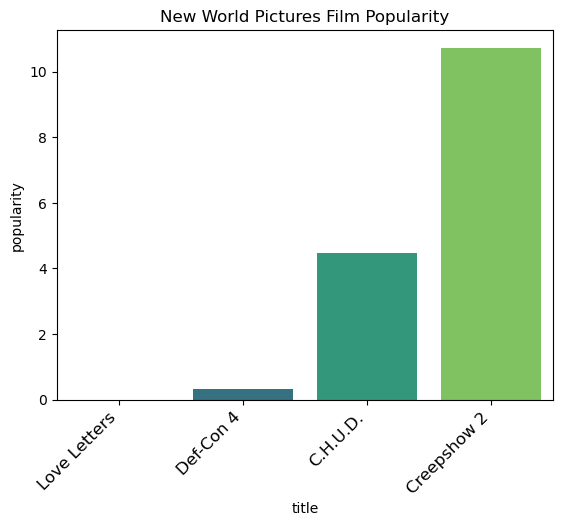

In [310]:
sns.barplot(x='title',
            y='popularity',
            data= love_films_2,
            palette = 'viridis')

plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='large'
           )

plt.title('New World Pictures Film Popularity')

plt.show()

> ### Conclusion:
>
>
> *Love Letters* is the film in our database with the lowest popularity value for films with production team data. Investigating further, we see that all films produced by *New World Pictures* have a popularity of less than 15.